In [1]:
# Imports Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (color_codes = True) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
%matplotlib inline

In [2]:
# Get the dataset
customers = pd.read_csv ("Ecomm-Customers.csv",index_col=0)
# Load the dataset
customers.head()

,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Email,,,,,,,
mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# Data Analysis
customers.describe()  

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
# To Find the Numerical Features,Categorical Features, Alphanumeric Features
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, mstephenson@fernandez.com to hannahwilson@davidson.com
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Address               500 non-null    object 
 1   Avatar                500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 31.2+ KB


In [5]:
# Checking null values
customers.isnull().sum()

Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
# Checking the columns
customers.columns

Index(['Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

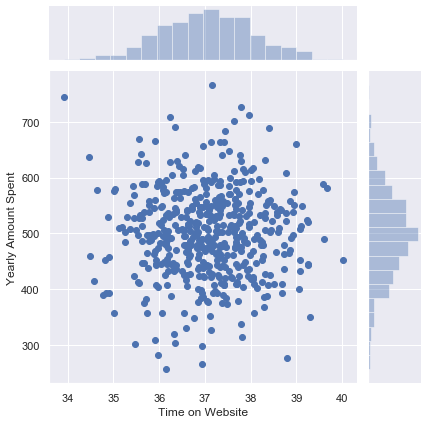

In [7]:
# Exploratory Data Analysis: explore the data to find the relationship between the features
sns.jointplot (x= "Time on Website",y= "Yearly Amount Spent", data= customers)
plt.show()

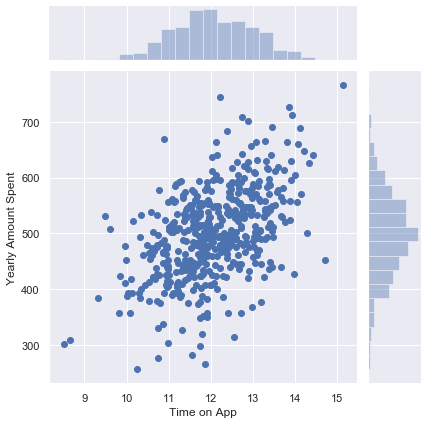

In [8]:
# Exploratory Data Analysis: comparing time on App and Yearly Amount Spent
sns.jointplot (x= "Time on App", y= "Yearly Amount Spent", data=customers)
plt.show()

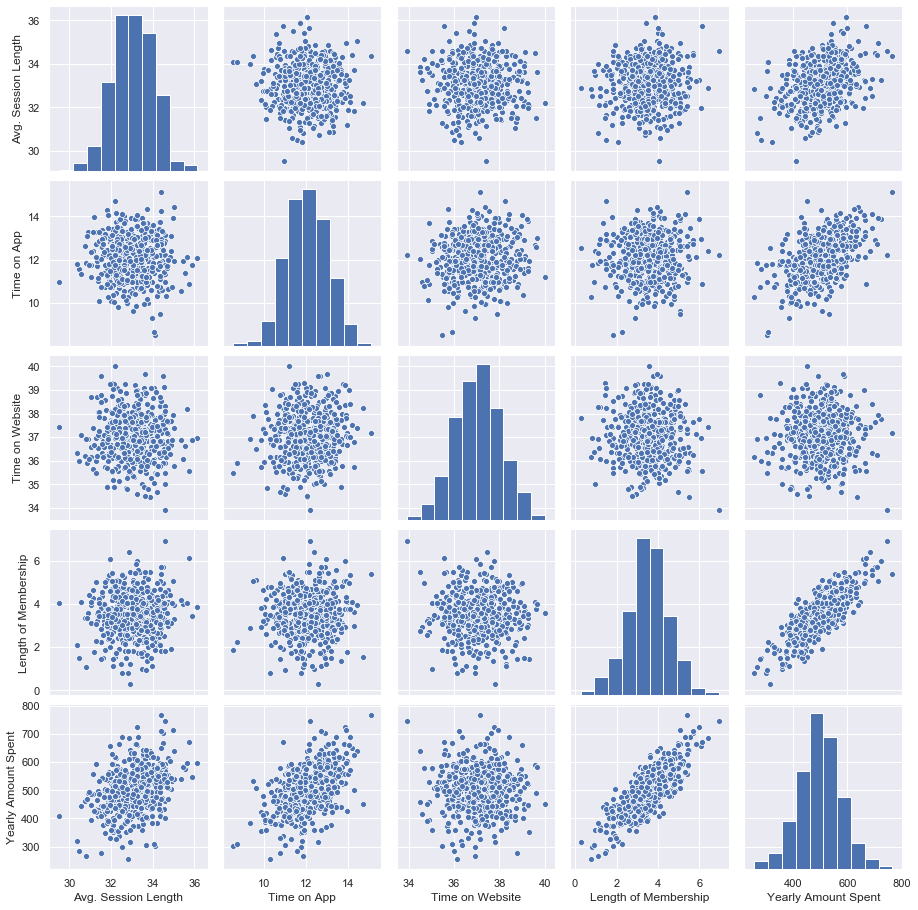

In [9]:
# Exploratory Data Analysis: Comparing the co-relation between entire features in E-commerce data
sns.pairplot (customers)  
plt.show()

In [10]:
# X are the independent vaiables and Y is the dependent variable
x=customers[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = customers["Yearly Amount Spent"]
# Split the datasets into train and test giving 30% as test data and 70% as train data
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.30, random_state=50)

In [11]:
lm = LinearRegression()
lm.fit (x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Print out the coefficients
lm.coef_   

array([25.67128004, 38.70819291,  0.20742337, 61.78910122])

In [13]:
# Predicting the dataset
predictions = lm.predict (x_test)  
print(predictions)

[523.94203812 426.34444073 313.17058035 504.34448336 465.52729697
 486.82265862 375.0021814  552.53816058 394.49334798 512.22127514
 503.97062588 570.26463998 340.03428066 468.48285904 518.24946899
 498.09535487 516.97019397 502.23482842 508.53473955 279.60433685
 495.23308369 556.9079109  578.00345811 657.82772891 565.31888798
 478.61683312 426.96868355 623.12805006 599.70114535 449.42568969
 387.67815612 485.16236466 430.24338325 490.41571109 558.97535776
 507.19161403 494.15182394 515.34812005 513.35645198 574.02632983
 554.01478487 347.4891829  548.76960985 515.88229022 380.21484343
 505.74922508 471.89401757 513.5420302  431.75526417 505.24714101
 412.23226294 462.22254397 540.81803969 574.76513792 254.5202912
 379.68915161 598.67756842 557.91158511 588.05904073 535.2854416
 753.87572529 703.52721696 501.17071843 427.75584872 502.3725083
 519.83811661 438.17375132 493.02487522 492.21968114 435.41058405
 601.74925986 400.99593124 511.05603193 567.43048104 471.84848763
 468.16381625

Text(0, 0.5, 'Predicted values')

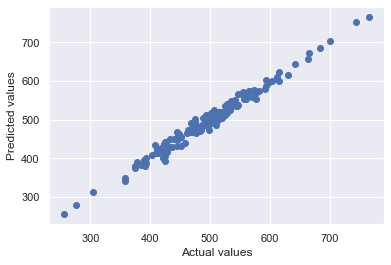

In [14]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [15]:
# Evaluating the model: Lets evaluate the model performance by calculating the residual sum of squares and  explained variance score (r**2)
print ("MAE", metrics.mean_absolute_error (y_test, predictions))
print ("MSE", metrics.mean_squared_error (y_test, predictions))
print ("RMSE", np.sqrt (metrics.mean_squared_error (y_test, predictions)))
metrics.explained_variance_score (y_test, predictions)

MAE 8.753449919562721
MSE 118.31895009209079
RMSE 10.87745145206775


0.98141158963793